# Utility, Inspection & Interoperability

Flow gives you flexible tools to inspect, debug, and branch your data pipelines, as well as connect to external libraries like pandas. These tools help you:

- ✅ Peek into streams
- ✅ Materialize for reuse
- ✅ Split pipelines
- ✅ Convert to pandas for export or further analysis

---

## 🔍 Inspecting Your Flow

### `.first()` – Get the First Record

```python
flow.first()
```

Returns the first record (or None if empty).

> ⚠️ This materializes the full flow under the hood. For lightweight preview, use .head() instead.

---

### `.head(n)` – Peek at the First N Records

```python
flow.head(3)
```

Returns a new Flow with just the first n records. Safe for previewing.

---

### `.is_empty()` – Check if Flow is Empty

```python
if flow.is_empty():
    print("No records")
```

Efficiently checks for the presence of at least one record.

---

### `.keys(limit=100)` – Explore Schema

```python
flow.keys()
# → {'player.name', 'location', 'shot_xg', ...}
```

Looks at a sample of records and returns the union of top-level (or flattened) keys.

---

### `len(flow)` – Count Records

```python
print(len(flow))
```

Materializes and counts records.

### `.schema(n=100)` – Infer Types

```python
Flow(...).schema()
# => {'shot_xg': float, 'player.name': str}
```

Internally flattens records and maps keys to their types.

### `.explain()` – Visualize the Plan

```python
Flow(...).filter(...).assign(...).explain()
```

Shows the steps in your DAG and highlights which ones materialize data.

---

## 📦 Materializing Data

Flow is lazy by default. Use these methods to “force” evaluation.

### `.collect()` – Convert to List

```python
records = Flow(...).collect()
```

Loads all records into memory as a list of dicts.

### `.cache()` – Materialize Once

```python
flow.cache()
```

Materializes the current records into memory and gives you a new Flow from that result.

---

## 🧩 Custom Logic: `.pipe()`

### `.map(func)` – Transform Records

Applies a function to each record, replacing it with the returned dict.

```python
flow = flow.map(lambda r: {"name": r["player"]["name"], "x": r.get("x")})
```

If `func(record)` returns `None`, the record is skipped.

> 💡 Use `.map()` when you want to remap the entire record. Use `.assign()` to add or update fields while keeping the rest intact.

### `.pipe(func)` – Branch Into Custom Logic

Use `.pipe()` to cleanly encapsulate multi-step logic in a function:

```python
def filter_shots(flow):
    return flow.filter(lambda r: r.get("type") == "Shot")

Flow.from_folder("data/").pipe(filter_shots).select("player.name", "shot_xg")
```

## 🧩 Interop with Other Tools

### `.to_pandas()` – Convert to DataFrame

```python
df = Flow(...).flatten().to_pandas()
```

Converts the flow to a pandas DataFrame. This is useful for exporting to CSV, Excel, or other tools.

---

## ✅ Summary

| Method           | Purpose                                  |
| ---------------- | ---------------------------------------- |
| `.head(n)`       | Get first `n` records                    |
| `.first()`       | First record or `None`                   |
| `.is_empty()`    | Check if Flow yields any data            |
| `.keys()`        | Discover fields                          |
| `.schema()`      | Infer field types                        |
| `.explain()`     | Visualize DAG plan                       |
| `.map()`         | Transform records completely             |
| `.pipe()`        | Encapsulate logic or interop with pandas |
| `.collect()`     | Materialize to list                      |
| `.cache()`       | Materialize once and cache in memory     |
| `.to_pandas()`   | Convert to DataFrame                     |


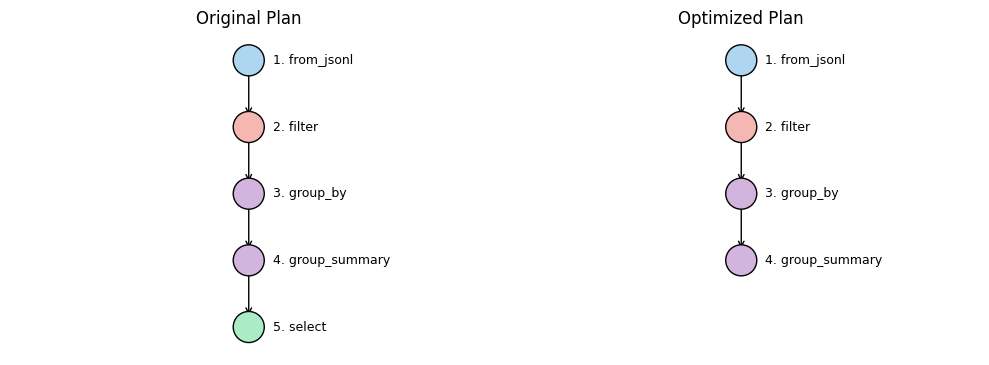

In [ ]:
from penaltyblog.matchflow import Flow


flow = (
    Flow.from_jsonl("data.jsonl")
        .select("x", "sum_x")    
        .filter(lambda r: r["x"] > 0)
        .group_by("x")
        .summary({"sum_x": ("sum", "x")})
)
flow.plot_plan(compare=True)